In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft


data = loadmat('complex.mat')

# Kiírjuk a fájl kulcsait
print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Complex_signal'])


In [2]:
complex_signal = data['Complex_signal']
print(complex_signal)

[[(array([[array(['ECG Lead I'], dtype='<U10'),
          array(['ECG Lead II'], dtype='<U11'),
          array(['ECG Lead V'], dtype='<U10'), array(['ART'], dtype='<U3'),
          array(['PAP'], dtype='<U3'), array(['CVP'], dtype='<U3'),
          array(['Resp. Imp.'], dtype='<U10')]], dtype=object), array([[39.        , 39.00277778, 39.00555556, ..., 68.99444445,
          68.99722223, 69.00000001]]), array([[ 0.   ,  0.   ,  0.   , ...,  0.232,  0.244,  0.252],
         [ 0.028,  0.04 ,  0.044, ..., -0.364, -0.412, -0.46 ],
         [ 0.092,  0.096,  0.1  , ..., -1.064, -1.004, -0.94 ],
         ...,
         [11.35 , 10.05 ,  9.15 , ..., 18.   , 18.   , 18.1  ],
         [-0.5  , -0.75 , -0.9  , ...,  8.45 ,  8.65 ,  8.75 ],
         [ 0.082,  0.081,  0.08 , ...,  0.082,  0.082,  0.08 ]]))                                                               ]]


In [3]:
data = loadmat('complex.mat')

signal_names = data['Complex_signal'][0][0]['names'][0]
time_data = data['Complex_signal'][0][0]['time']
values_data = data['Complex_signal'][0][0]['values']

lead_i_index = list(signal_names).index('ECG Lead I')

ecg_lead_i_values = values_data[lead_i_index]

print(f"time_data: {time_data}")
print(f"ecg_lead_i_values: {ecg_lead_i_values}")

if isinstance(ecg_lead_i_values, np.ndarray) and len(ecg_lead_i_values.shape) > 1:
    ecg_lead_i_values = ecg_lead_i_values.flatten()

if isinstance(time_data, np.ndarray) and isinstance(ecg_lead_i_values, np.ndarray):
    if len(time_data) != len(ecg_lead_i_values):
        print(f"Méretbeli eltérés: time_data: {len(time_data)}, ecg_lead_i_values: {len(ecg_lead_i_values)}")
else:
    print(f"A time_data vagy ecg_lead_i_values nem megfelelő formátumú.")

time_data: [[39.         39.00277778 39.00555556 ... 68.99444445 68.99722223
  69.00000001]]
ecg_lead_i_values: [0.    0.    0.    ... 0.232 0.244 0.252]
Méretbeli eltérés: time_data: 1, ecg_lead_i_values: 10801


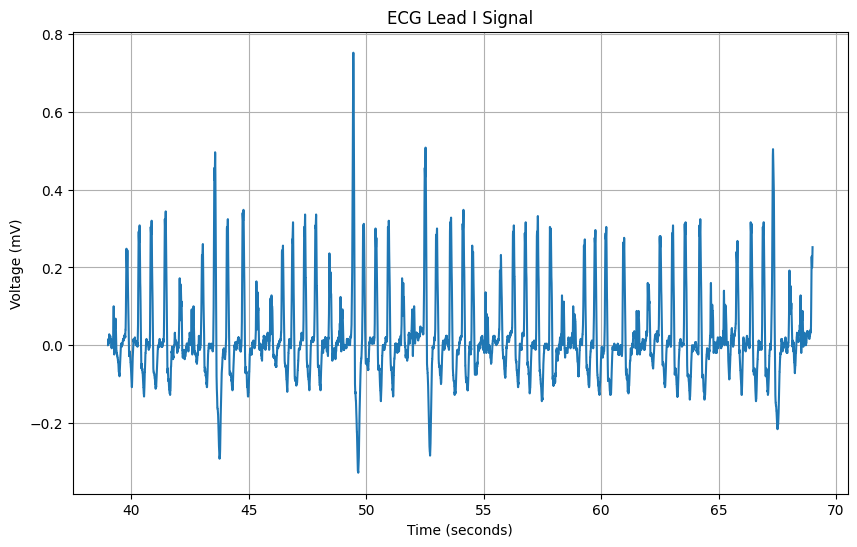

In [4]:
num_samples = 6000
signal_names = data['Complex_signal'][0][0]['names'][0]
time_data = data['Complex_signal'][0][0]['time']
values_data = data['Complex_signal'][0][0]['values']

lead_i_index = list(signal_names).index('ECG Lead I')

ecg_lead_i_values = values_data[lead_i_index]

time_data_flat = time_data.flatten()

if isinstance(ecg_lead_i_values, np.ndarray) and len(ecg_lead_i_values.shape) > 1:
    ecg_lead_i_values = ecg_lead_i_values.flatten()

if len(time_data_flat) != len(ecg_lead_i_values):
    print(f"Méretbeli eltérés: time_data: {len(time_data_flat)}, ecg_lead_i_values: {len(ecg_lead_i_values)}")
else:

    time_plot = time_data_flat[:num_samples]
    ecg_plot = ecg_lead_i_values[:num_samples]
    plt.figure(figsize=(10, 6))
    plt.plot(time_data_flat, ecg_lead_i_values)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Voltage (mV)')
    plt.title('ECG Lead I Signal')
    plt.grid(True)
    plt.show()


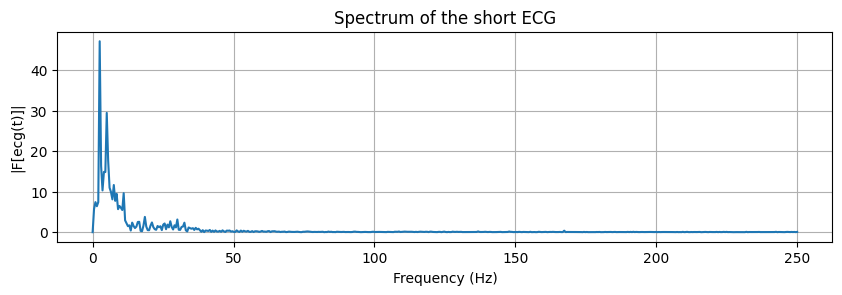

In [5]:

fs = 500
short_time = 2
short_sample = int(fs * short_time)
ECG_short = ecg_lead_i_values[:short_sample]

plt.figure(figsize=(10, 6))
plt.plot(ECG_short)
plt.xlabel('time (s)')
plt.ylabel('mV')
plt.title('Short ECG in time')
plt.grid(True)
plt.show()

fECG_short = abs(fft(ECG_short - np.mean(ECG_short)))
f = np.linspace(0, fs/2, short_sample//2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(f, fECG_short[:short_sample//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|F[ecg(t)]|')
plt.title('Spectrum of the short ECG')
plt.grid(True)
plt.show()

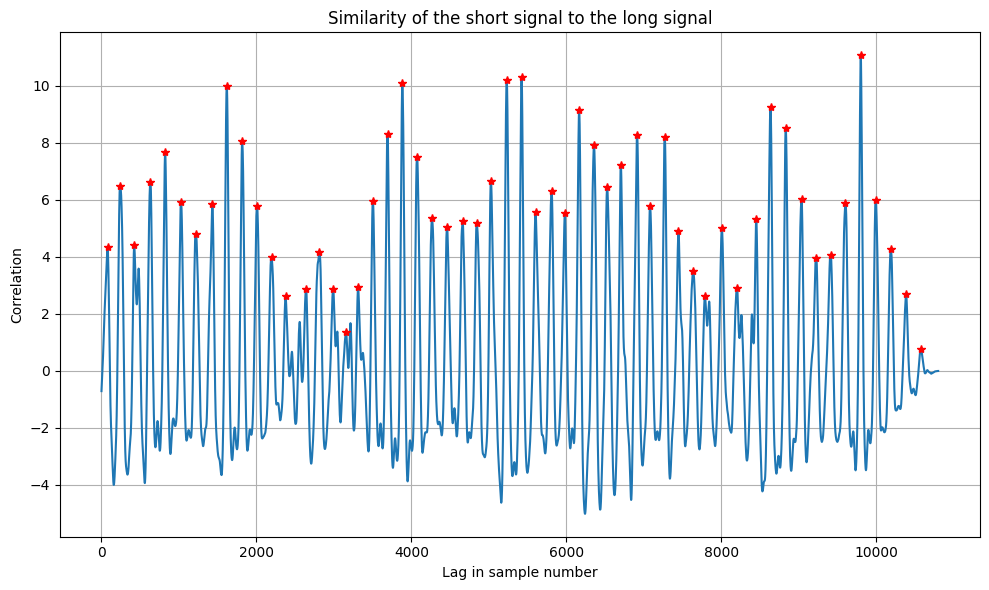

In [6]:
from scipy.signal import find_peaks

lag_size = len(ecg_lead_i_values) + len(ECG_short) - 1

ECG_corr = np.correlate(ECG_short, ecg_lead_i_values, mode='full')
lags = np.arange(-len(ECG_short) + 1, len(ecg_lead_i_values))

start_index = len(ECG_short) - 1
ECG_corr = ECG_corr[start_index:]
lags = lags[start_index:]

plt.figure(figsize=(10, 6))
plt.plot(lags, ECG_corr)
plt.xlabel('Lag in sample number')
plt.ylabel('Correlation')
plt.title('Similarity of the short signal to the long signal')
plt.grid(True)

min_peak_distance = 100
min_peak_height = 0.5

peaks, _ = find_peaks(ECG_corr, distance=min_peak_distance, height=min_peak_height)

plt.plot(peaks, ECG_corr[peaks], 'r*')
plt.tight_layout()
plt.show()


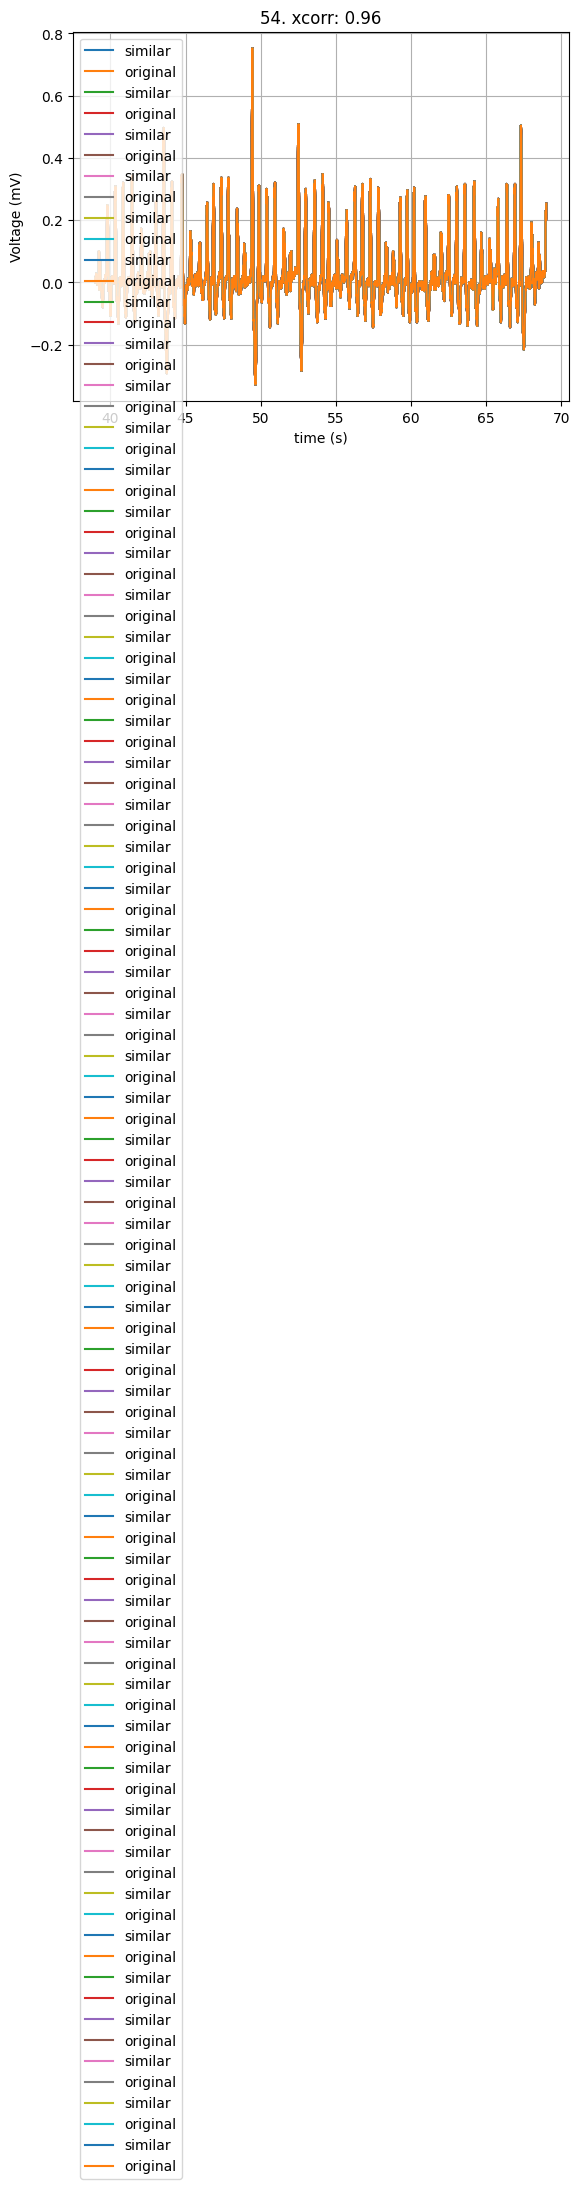

In [7]:
similars = []

plt.figure(3)
for i in range(len(peaks)):

    start_index = peaks[i] - len(ECG_short) // 2
    end_index = start_index + len(ECG_short)

    if start_index >= 0 and end_index <= len(ecg_lead_i_values):
        temp = ecg_lead_i_values[start_index:end_index]
        similars.append(start_index)

        plt.plot(time_data_flat[start_index:end_index], temp, label='similar')
        plt.plot(time_data_flat, ecg_lead_i_values, label='original')
        plt.xlabel('time (s)')
        plt.ylabel('Voltage (mV)')
        plt.legend()
        plt.title(f"{i + 1}. xcorr: {peaks[i] / max(peaks):.2f}")
        plt.grid(True)

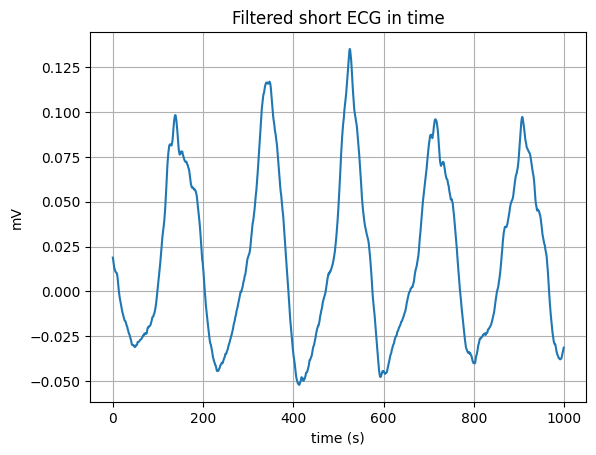

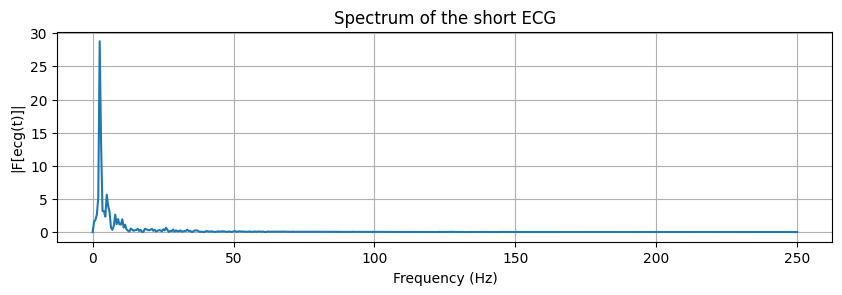

In [8]:
final_averaged = ECG_short.copy()
for start_index in similars:
    end_index = start_index + len(ECG_short)
    final_averaged += ecg_lead_i_values[start_index:end_index]
final_averaged /= (len(similars) + 1)


plt.plot(final_averaged)
plt.xlabel('time (s)')
plt.ylabel('mV')
plt.title('Filtered short ECG in time')
plt.grid(True)
plt.show()

fECG_short_averaged = abs(fft(final_averaged - np.mean(final_averaged)))
f = np.linspace(0, fs/2, short_sample//2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(f, fECG_short_averaged[:len(final_averaged)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('|F[ecg(t)]|')
plt.title('Spectrum of the short ECG')
plt.grid(True)
plt.show()